In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import font_manager

for font in font_manager.fontManager.ttflist:
    if 'lim' in font.name:
        print(font.name, font.fname)

New Gulim C:\Windows\Fonts\NGULIM.TTF
Gulim C:\Windows\Fonts\gulim.ttc


In [4]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



## 정규방정식을 이용한 선형 회귀

In [5]:
import numpy as np
X = 2*np.random.rand(100, 1)
y = 4+3*X+np.random.rand(100, 1)

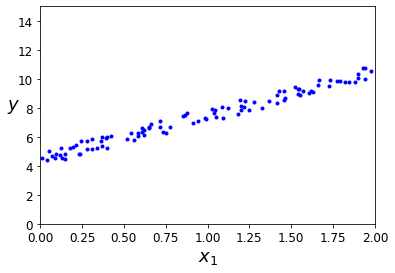

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.51359766],
       [2.98323418]])

#### 기댓값 : 4, 3 
결과값 -> 정확하지 않음

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

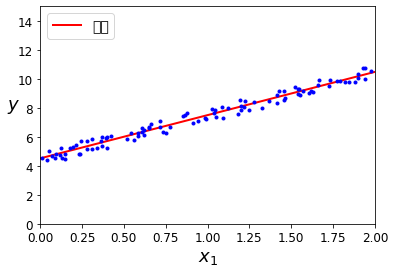

In [10]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

## 4.1.2 계산복잡도

특성 수가 매우 많아지면 정규방정식이 매우 느려짐 \
정규방정식의 시간복잡도는 샘플수/특성수에 선형적

## 4.2 경사하강법

비용함수를 최소화 하기 위해 반복해서 피라미터 조정 \ 

그래디언트가 감소하는 방향으로 진행 -> 0데 도달 -> 최솟값 \ 

학습률 = 스텝의 크기 \

학습률이 너무 크면 전역최솟값보다 덜좋은 지역최솟값에 수렴

## 4.2.1 배치 경사 하강법

#### 편도함수

각 모델 파라미터에 대해 비용함수의 그래디언트를 계산해야 함 \
-> 파라미터가 변경될 때 비용함수가 얼마나 바뀌는지를 계산해야 함

매 경사 하강법 스텝에서 전체 훈련세트 x에 대해 계산 \
매 스텝에서 훈련데이터 전체를 사용

In [12]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [13]:
theta

array([[4.51359766],
       [2.98323418]])

값이 정규방정식으로 찾은것과 같음

### 학습률이 달라짐에 따른 경사하강법

In [14]:

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

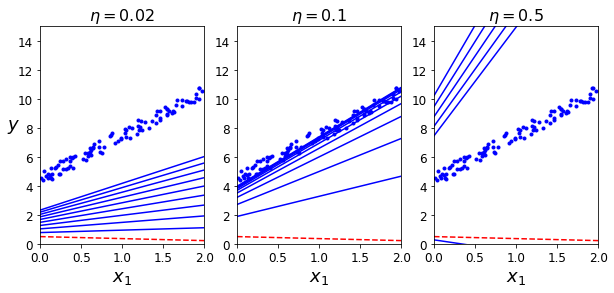

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

## 4.2.2 확률적 경사 하강법

매 스텝에서 한개의 샘플을 무작위로 선택 후 그 샘플에 대한 그래디언트를 계산

비용함수가 매우 불규칠 -> 알고리즘이 지역최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사하강법이 배치 경사 하강법보다 전역최솟값ㅇ르 찾을 가능성이 높음

In [16]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        theta = theta-eta * gradients

In [17]:
theta

array([[4.51230525],
       [3.0308627 ]])

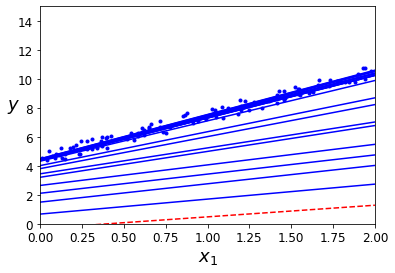

In [19]:

theta_path_sgd = []
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 빠짐
            y_predict = X_new_b.dot(theta)           # 책에는 빠짐
            style = "b-" if i > 0 else "r--"         # 책에는 빠짐
            plt.plot(X_new, y_predict, style)        # 책에는 빠짐
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 빠짐

plt.plot(X, y, "b.")                                 # 책에는 빠짐
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 빠짐
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 빠짐
plt.axis([0, 2, 0, 15])                              # 책에는 빠짐
plt.show()                                           # 책에는 빠짐

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter= 50, penalty= None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.49718113]), array([2.98977032]))

## 4.2.3 미니배치 경사 하강법

미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산

sgd보다 최솟값에 더 가까이에 도달 + 지역최솟값에서 빠져나오기 힘듦

## 4.3 다항회귀

In [30]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X+2+np.random.randn(m, 1)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=  PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.68668499])

In [32]:
X_poly[0]

array([-0.68668499,  0.47153628])

-> X_poly는 특성 X와 특성의 제곱을 포함함 \
확장된 훈련데이터에 Linear Regression 적용

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.03624866]), array([[0.90940492, 0.50456857]]))

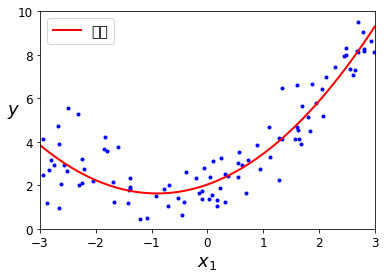

In [34]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 4.4 학습곡선

훈련세트와 검증세트의 모델 성능을 훈련세트 크기의 함수로 나타냄

편향/분산 트레이드오프

편향 \
일반화 오차중에서 편향은 잘못된 가정으로 인한 것 -> 과소적합되기 쉬움 \

분산\
훈련데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남 \
자유도가 높으면 보통 높은 분산 -> 과대적합 \

줄일 수 없는 오차\
데이터 자체에 있는 노이즈 때문에 발생 \
-> 노이즈 제거하기

#### 모델의 복잡도 커짐 -> 분산 커짐 -> 편향 줄어듦

## 4.5 규제가 있는 선형 모델

### 4.5.1 릿지회귀

규제가 추가된 선형 회귀 버전 \
규제항이 비용함수에 추가됨

모델의 가중치가 가능한 한 작게 유지되도록 노력함

a는 모델을 얼마나 규제할지 조절함 \
a = 0이면 릿지회귀 = 선형회귀\
a가 아주 크면 모든 가중치가 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨 

### 4.5.2 라쏘회귀

비용함수에 규제항을 더하지만 노름의 제곱을 2로 나눈것 대신 벡터의 l1노름을 사용

덜중요한 특성의 가중치를 제거하려고 함\
자동으로 특성을 선택하고 희소모델을 만듦\


### 4.5.3 엘라스틱넷

릿지회귀와 라쏘회귀를 절충한 모델\

r = 0 -> 릿지회귀\
r = 1 -> 라쏘회귀\

### 4.5.4 조기종료

## 4.6 로지스틱 회귀

## 4.6.3 결정경계

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [40]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
# 최적화 문제에 사용할 알고리즘 작은 데이터세트의 경우 liblinear가 좋음
# 큰 데이터셋일 경우는 sag와 saga 사용
log_reg.fit(X, y)

LogisticRegression(solver='liblinear')

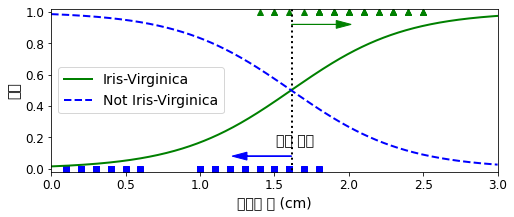

In [43]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("꽃잎의 폭 (cm)", fontsize=14)
plt.ylabel("확률", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [45]:
## 꽃잎 너비가 1.6 보다 크면 분류기는 verginica로 분류 작으면 아니라고예측

In [44]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

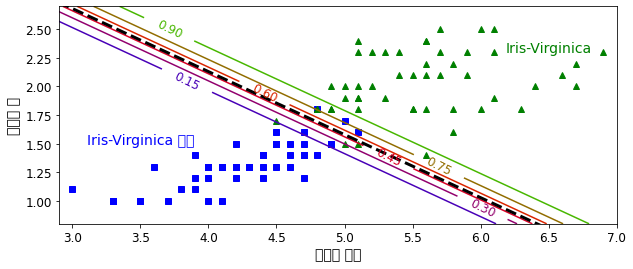

In [46]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### 4.6.4 소프트맥스 회귀

소프트맥스 회귀 = 다항 로지스틱 회귀 \
여러개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화

샘플 x가 주어지면 소프트맥스 회귀모델이 각 클래스 k에 대한 점수를 계산하고 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정함

소프트맥스 함수\

선택해야 하는 선택지 k 개\
k차원의 벡터를 입력받아 각 클래스에 대한 확률 추정

In [47]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [48]:
softmax_reg.predict([[5, 2]])

array([2])

In [49]:
softmax_reg.predict_log_proba([[5, 2]])

array([[-14.26490421,  -2.85609209,  -0.05921261]])